# SABR Model Test Code

In [1]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import option_models as opt

In [2]:
### only run this when you changed the class definition
CODE_CHANGED = True
if( CODE_CHANGED ):
    imp.reload(opt)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
# strike = 110 # should work for scalar value 
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = opt.sabr.ModelHagan(texp, sigma, alpha=alpha, rho=rho, beta=beta)
sabr_bsm.__dict__

{'beta': 1,
 'texp': 1,
 'sigma': 0.2,
 'alpha': 0.3,
 'rho': 0.25,
 'intr': 0,
 'divr': 0,
 'bsm_model': <option_models.bsm.Model at 0xf23c828>}

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward)
bsm_vol = sabr_bsm.bsm_vol(strike, forward)

price, bsm_vol

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([0.19740451, 0.19730124, 0.19731138, 0.19742763, 0.19764276,
        0.19794962, 0.19834124, 0.19881083, 0.19935186, 0.19995804,
        0.2006234 , 0.20134229, 0.20210938, 0.20291966, 0.2037685 ,
        0.20465155, 0.20556483, 0.20650464, 0.2074676 , 0.20845059,
        0.20945078, 0.21046559, 0.21149265, 0.21252984, 0.21357521]))

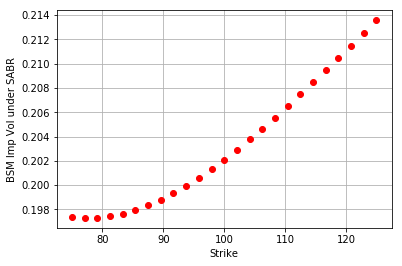

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [7]:
# implied vol (sigma in this case)
# you should get back the original sigma
sabr_bsm.impvol(price[11], strike[11], forward)

0.19999999999936008

### (2) SABR for $\beta=0$

In [8]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25
beta = 0

In [9]:
nvol = opt.sabr.norm_vol(strike, forward, texp, sigma, alpha=alpha, rho=rho)

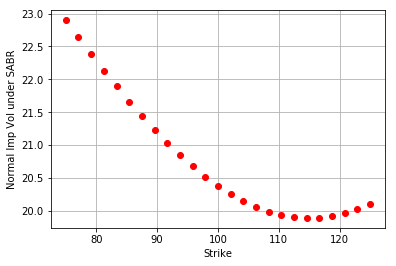

In [10]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [11]:
sabr_norm = opt.sabr.ModelNormalHagan(texp, sigma, alpha=alpha, rho=rho)
sabr_norm.__dict__

{'beta': 0.0,
 'texp': 1,
 'sigma': 20,
 'alpha': 0.5,
 'rho': -0.25,
 'intr': 0,
 'divr': 0,
 'normal_model': <option_models.normal.Model at 0xf23cef0>}

In [12]:
price = sabr_norm.price(strike, forward)
norm_vol = sabr_norm.norm_vol(strike, forward)
price, norm_vol

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([22.898288  , 22.63620745, 22.38073263, 22.1326082 , 21.89263645,
        21.66167534, 21.44063425, 21.2304669 , 21.03216098, 20.84672415,
        20.67516621, 20.5184775 , 20.37760417, 20.25342105, 20.1467038 ,
        20.05810179, 19.98811408, 19.93707021, 19.9051177 , 19.89221722,
        19.89814614, 19.92250965, 19.9647587 , 20.02421277, 20.10008575]))

In [13]:
# implied vol (e.g. sigma)
sabr_norm.impvol(price[11], strike[11], forward)

19.999999999999922

### (3) Smile calibration to 3 options

In [14]:
strike3 = np.array([90, 100, 110])
price3 = sabr_norm.price(strike3, forward)
norm_vol3 = sabr_norm.norm_vol(strike3, forward)

price3, norm_vol3

(array([14.37778096,  8.12948788,  3.9368394 ]),
 array([21.18982474, 20.37760417, 19.94575372]))

In [15]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(norm_vol3, strike3, forward, is_vol=True)

(19.999999999974257, 0.4999999998914349, -0.25000000007807877)

In [16]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

(19.999999999974257, 0.4999999998914349, -0.25000000007807877)

Below is same for sabr_bsm

In [17]:
strike3 = np.array([90, 100, 110])
price3  = sabr_bsm.price(strike3, forward)
bsm_vol3 = sabr_bsm.bsm_vol(strike3, forward)

price3, bsm_vol3

(array([13.55352055,  8.0492952 ,  4.52747026]),
 array([0.19891353, 0.20210938, 0.20631472]))

In [18]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(bsm_vol3, strike3, forward, is_vol=True)

(0.20000000000300716, 0.2999999993022627, 0.2500000005498378)

In [19]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, is_vol=False)

(0.20000000000316703, 0.29999999928529303, 0.2500000005589751)

## 2. Pricing under MC method

In [20]:
strike = np.linspace(75,125,num=25)
forward = 100

In [21]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                  alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000000000F23C828>}


In [22]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.56414473, 23.67281857, 21.83255432, 20.05339451, 18.36332252,
        16.74765672, 15.21094858, 13.77153134, 12.42121136, 11.1537645 ,
         9.97283042,  8.87018752,  7.85345809,  6.93761545,  6.12596679,
         5.42254877,  4.77416342,  4.18674364,  3.64900988,  3.17217661,
         2.74814067,  2.37704402,  2.05607388,  1.78916499,  1.56428811]))

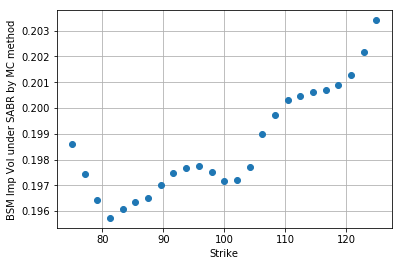

In [23]:
# test the calculation of implied bsm volatility
bsm_vol = sabr_bsm_mc.bsm_vol(strike, forward)
plt.plot(strike, bsm_vol, 'o')
plt.ylabel('BSM Imp Vol under SABR by MC method')
plt.xlabel('Strike')
plt.grid()
plt.show()

Repeat the same for beta = 0

In [24]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.texp, sabr_norm.sigma, 
                                   alpha=sabr_norm.alpha, rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000000000F23CEF0>}


In [25]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.51903268, 24.66316635, 22.84363199, 21.05954951, 19.32123595,
        17.64086193, 16.01226751, 14.47026136, 13.01411474, 11.64570876,
        10.3495403 ,  9.13240427,  7.99450412,  6.94904419,  5.98976678,
         5.10823607,  4.32470733,  3.62324031,  3.00505746,  2.47004367,
         2.00949819,  1.62988419,  1.31348774,  1.04939471,  0.8499198 ]))

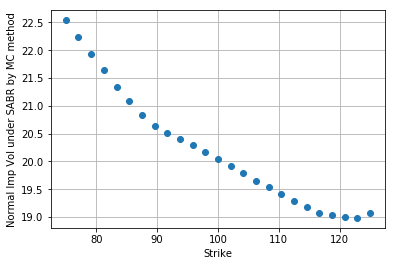

In [26]:
# test the calculation of implied normal volatility
norm_vol = sabr_norm_mc.norm_vol(strike, forward)
plt.plot(strike, norm_vol, 'o')
plt.ylabel('Normal Imp Vol under SABR by MC method')
plt.xlabel('Strike')
plt.grid()
plt.show()

## 3. Pricing under conditional MC method

In [27]:
strike = np.linspace(75,125,num=25)
forward = 100

In [28]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                       alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000000000F23C828>}


In [29]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_cmc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.58615686, 23.70640657, 21.88210798, 20.12158025, 18.43269377,
        16.82252404, 15.29705365, 13.86094596, 12.51740455, 11.26812225,
        10.11331397,  9.0518207 ,  8.0812674 ,  7.19825607,  6.39857584,
         5.67741442,  5.02955855,  4.44957471,  3.93196485,  3.47129477,
         3.06229526,  2.69993772,  2.37948679,  2.09653359,  1.84701269]))

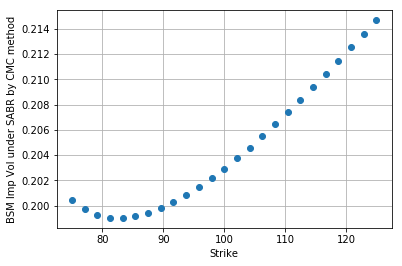

In [30]:
# test the calculation of implied bsm volatility
bsm_vol = sabr_bsm_cmc.bsm_vol(strike, forward)
plt.plot(strike, bsm_vol, 'o')
plt.ylabel('BSM Imp Vol under SABR by CMC method')
plt.xlabel('Strike')
plt.grid()
plt.show()

Repeat the same for beta = 0

In [31]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.texp, sabr_norm.sigma, alpha=sabr_norm.alpha, 
                                        rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000000000F23CEF0>}


In [32]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_cmc.price(strike, forward)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.53961421, 24.70330516, 22.90365476, 21.14545575, 19.43388355,
        17.77444526, 16.17289863, 14.63513697, 13.16703791, 11.77427695,
        10.46211134,  9.23514482,  8.09708893,  7.05054143,  6.0968042 ,
         5.23576245,  4.46584214,  3.78405466,  3.18612744,  2.66670837,
         2.21962372,  1.83816343,  1.51536708,  1.24428696,  1.01821063]))

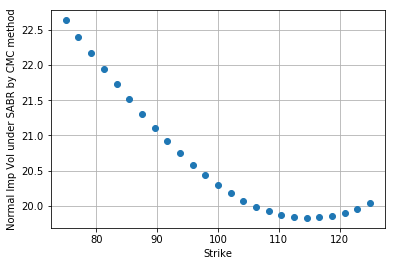

In [33]:
# test the calculation of implied normal volatility
norm_vol = sabr_norm_cmc.norm_vol(strike, forward)
plt.plot(strike, norm_vol, 'o')
plt.ylabel('Normal Imp Vol under SABR by CMC method')
plt.xlabel('Strike')
plt.grid()
plt.show()

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [34]:
strike = np.linspace(75,125,num=3)
forward = 100

In [35]:
price_bsm_mc = [sabr_bsm_mc.price(strike, forward, fix_seed=False) for i in range(100)]
price_bsm_cmc = [sabr_bsm_cmc.price(strike, forward, fix_seed=False) for i in range(100)]
print(np.mean(price_bsm_mc, axis=0), np.std(price_bsm_mc, axis=0))
print(np.mean(price_bsm_cmc, axis=0), np.std(price_bsm_cmc, axis=0))

[25.53965363  8.04115784  1.7913634 ] [0.61515586 0.40599396 0.21971933]
[25.55844673  8.05722047  1.81952805] [0.16100852 0.12860592 0.06192114]


In [36]:
price_normal_mc = [sabr_norm_mc.price(strike, forward, fix_seed=False) for i in range(100)]
price_normal_cmc = [sabr_norm_cmc.price(strike, forward, fix_seed=False) for i in range(100)]
print(np.mean(price_normal_mc, axis=0), np.std(price_normal_mc, axis=0))
print(np.mean(price_normal_cmc, axis=0), np.std(price_normal_cmc, axis=0))

[26.62609246  8.1497531   1.02815666] [0.50818662 0.32742446 0.13876206]
[26.57053902  8.12224769  1.0298465 ] [0.10805805 0.03927243 0.02187788]


By the result conditional MC has smaller variances than brute-force MC